In [1]:
import pandas as pd
import numpy as np

In [2]:
# Step 1: Load Dataset
data = pd.read_csv("Titanic-Dataset.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Step 2: Exploratory Data Analysis

In [4]:
data.shape   # (rows, columns)

(891, 12)

In [5]:
data.columns        # List of column names

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
data.info()         # Data types, non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
data.describe()       # Summary stats (only numeric)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
data.isnull().sum()     # Number of missing values per column

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
data.duplicated().sum()     # Total duplicate rows

0

In [10]:
# doing in manual way

In [11]:
# Drop Irrelevant Columns

data = data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin']) 

In [12]:
# Step 3: Handling Missing Values  
from sklearn.impute import SimpleImputer

# For Age
imputer = SimpleImputer(strategy="mean")
data["Age"] = imputer.fit_transform(data[["Age"]])

# For Embarked (corrected)
imputer1 = SimpleImputer(strategy="most_frequent")
print(imputer1.fit_transform(data[["Embarked"]]).shape)
# (891, 1) — needs flattening
# data["Embarked"] = imputer1.fit_transform(data[["Embarked"]]) returns a 2D array of shape (n_rows, 1) BUT expects a 1D array (Series)
data["Embarked"] = imputer1.fit_transform(data[["Embarked"]]).ravel() # .ravel() converts it into a flat array
data["Embarked"].shape

(891, 1)


(891,)

In [13]:
# Converting categorical colum to binary
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

In [14]:
data["Embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

In [15]:
# Step 4: Encoding Categorical Variables
# OneHot Encode
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
Embarked = encoder.fit_transform(data[["Embarked"]]).toarray()

column_names = ["Southampton","Cherbourg","Queenstown"]

for i in range(len(Embarked.T)):
    data[column_names[i]] = Embarked.T[i]
data = data.drop(["Embarked"],axis=1)

In [16]:
#Step 5: scaling the features
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# For Age
data["Age"] = scaler.fit_transform(data[["Age"]])

# For Fare
data["Fare"] = scaler.fit_transform(data[["Fare"]])


In [17]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Southampton,Cherbourg,Queenstown
0,0,3,0,0.271174,1,0,0.014151,0.0,0.0,1.0
1,1,1,1,0.472229,1,0,0.139136,1.0,0.0,0.0
2,1,3,1,0.321438,0,0,0.015469,0.0,0.0,1.0
3,1,1,1,0.434531,1,0,0.103644,0.0,0.0,1.0
4,0,3,0,0.434531,0,0,0.015713,0.0,0.0,1.0


In [18]:
# creating a functions for automating the steps using pipelines

In [19]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

class NameDropper(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

class AgeEmbarkedImputer(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()  # prevent modifying original data (optional)

        # Impute 'Age' with mean
        age_imputer = SimpleImputer(strategy="mean")
        X["Age"] = age_imputer.fit_transform(X[["Age"]])

        # Impute 'Embarked' with most frequent
        embarked_imputer = SimpleImputer(strategy="most_frequent")
        X["Embarked"] = embarked_imputer.fit_transform(X[["Embarked"]]).ravel()

        return X

class FeatureEncoder(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()

        # Encode 'Sex'
        X['Sex'] = X['Sex'].map({'male': 0, 'female': 1})

        # One-hot encode 'Embarked'
        encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
        embarked_encoded = encoder.fit_transform(X[['Embarked']])

        # Create column names for the new one-hot columns
        embarked_cols = encoder.get_feature_names_out(['Embarked'])

        # Convert to DataFrame and concatenate
        embarked_df = pd.DataFrame(embarked_encoded, columns=embarked_cols, index=X.index)
        X = pd.concat([X.drop(columns=['Embarked']), embarked_df], axis=1)

        return X

class Scalar(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        # Initialize scalers for Age and Fare and fit them
        self.scaler_age = MinMaxScaler()
        self.scaler_fare = MinMaxScaler()

        self.scaler_age.fit(X[["Age"]])
        self.scaler_fare.fit(X[["Fare"]])
        return self

    def transform(self, X):
        X = X.copy()
        # Transform Age and Fare separately using the fitted scalers
        X["Age"] = self.scaler_age.transform(X[["Age"]])
        X["Fare"] = self.scaler_fare.transform(X[["Fare"]])
        return X

In [20]:
data1 = pd.read_csv("Titanic-Dataset.csv")
data1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [21]:
dropper = NameDropper()
imputer = AgeEmbarkedImputer()
encoder = FeatureEncoder()
scalar = Scalar()

In [22]:
# Step 1: Drop unwanted columns
data1 = dropper.fit_transform(data1)

In [23]:
# Step 2: Impute missing values
data1 = imputer.fit_transform(data1)

In [24]:
# Step 3: Encode categorical features
data1 = encoder.fit_transform(data1)

In [25]:
# Step 4: Scaling the features in the range 0 to 1
data1 = scalar.fit_transform(data1)

In [26]:
data1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,0.271174,1,0,0.014151,0.0,0.0,1.0
1,1,1,1,0.472229,1,0,0.139136,1.0,0.0,0.0
2,1,3,1,0.321438,0,0,0.015469,0.0,0.0,1.0
3,1,1,1,0.434531,1,0,0.103644,0.0,0.0,1.0
4,0,3,0,0.434531,0,0,0.015713,0.0,0.0,1.0


In [27]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ("dropper",NameDropper()),
    ("imputer",AgeEmbarkedImputer()),
    ("encoder",FeatureEncoder()),
    ("scalar",Scalar())
])

In [28]:
data2 = pd.read_csv("Titanic-Dataset.csv")
data2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [29]:
# Step 6: Final Cleaned Dataset  
pipe.fit_transform(data2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,0.271174,1,0,0.014151,0.0,0.0,1.0
1,1,1,1,0.472229,1,0,0.139136,1.0,0.0,0.0
2,1,3,1,0.321438,0,0,0.015469,0.0,0.0,1.0
3,1,1,1,0.434531,1,0,0.103644,0.0,0.0,1.0
4,0,3,0,0.434531,0,0,0.015713,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,0.334004,0,0,0.025374,0.0,0.0,1.0
887,1,1,1,0.233476,0,0,0.058556,0.0,0.0,1.0
888,0,3,1,0.367921,1,2,0.045771,0.0,0.0,1.0
889,1,1,0,0.321438,0,0,0.058556,1.0,0.0,0.0


In [30]:
#Step 6: Outlier Detection and Treatment
#Outliers are data points that are significantly higher or lower than the rest of your data.
#They can affect the mean, standard deviation, and model performance.

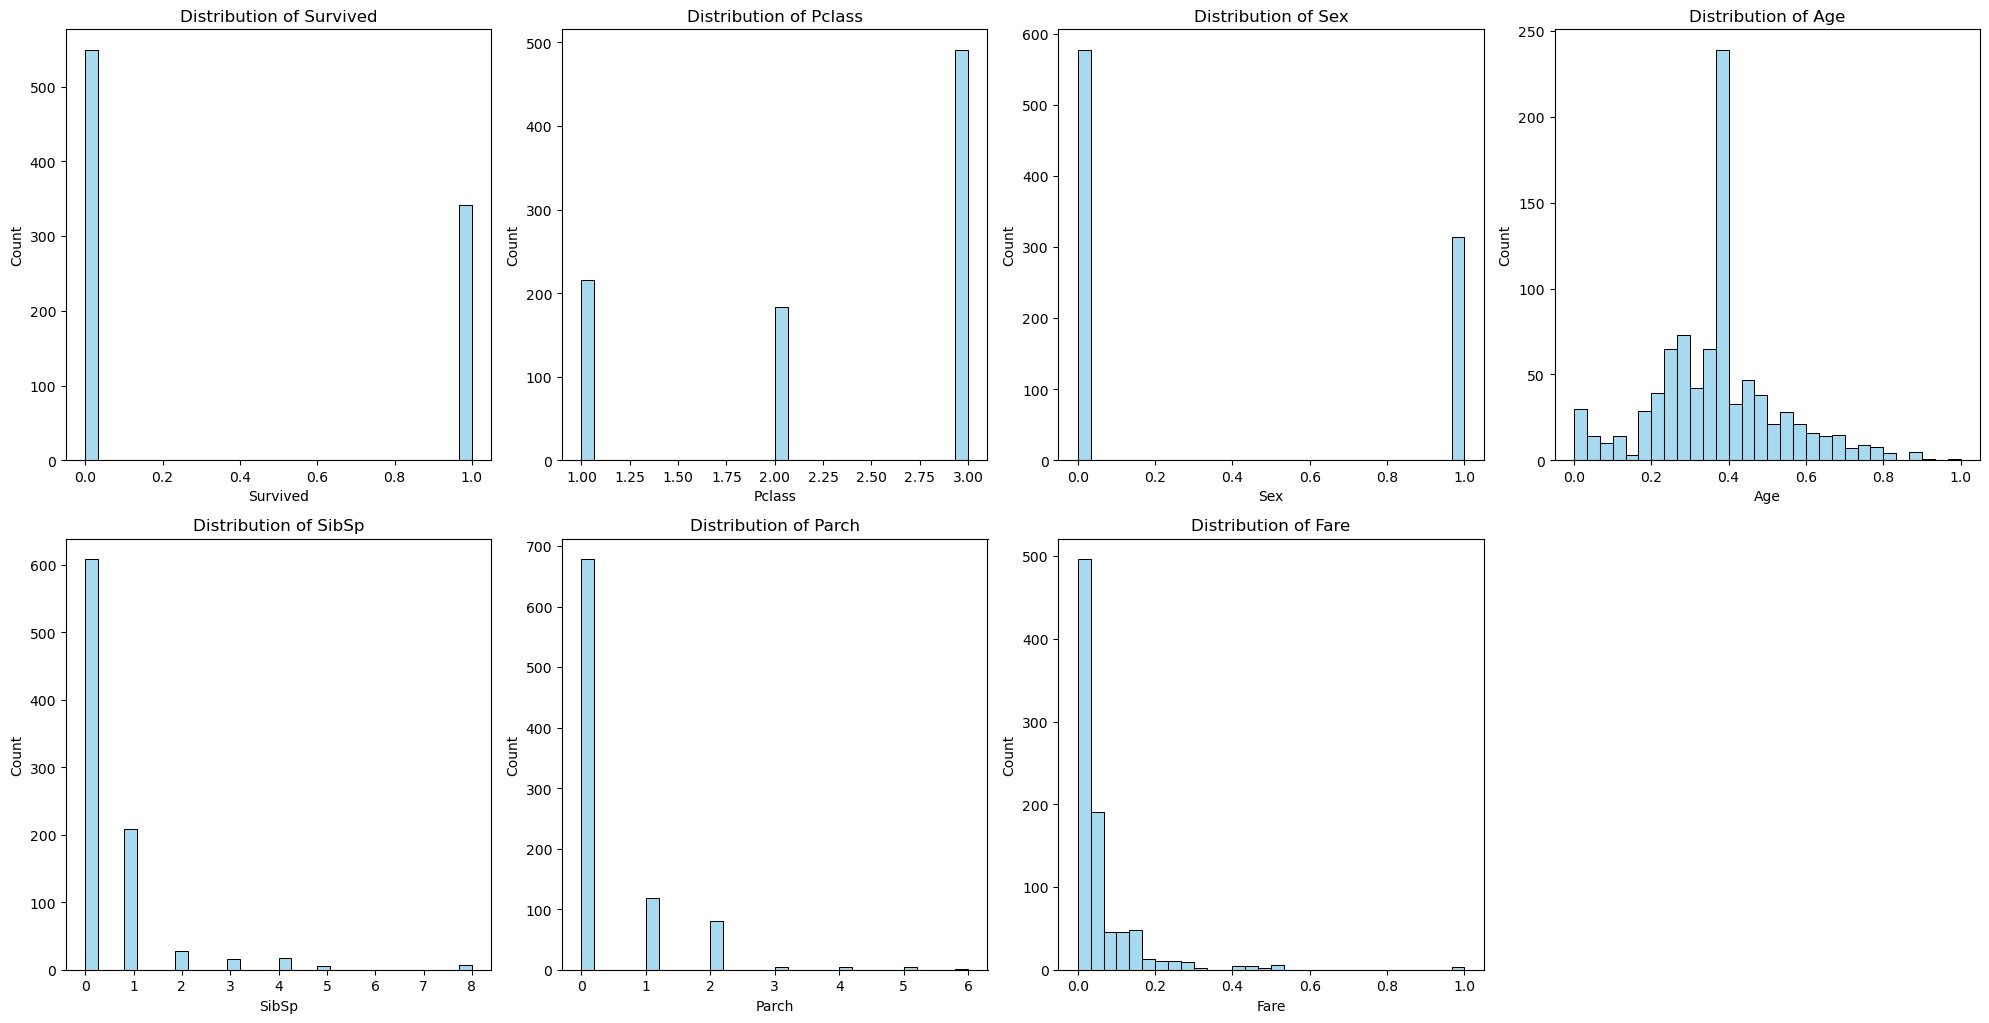

In [31]:

import matplotlib.pyplot as plt
import seaborn as sns

# Find Embarked columns dynamically
embarked_cols = [col for col in data.columns if col.startswith('Embarked')]

columns = ["Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare"] + embarked_cols

plt.figure(figsize=(20, 15))

for i, col in enumerate(columns, 1):
    plt.subplot(3, 4, i)

    if data[col].dtype in ['float64', 'int64']:
        sns.histplot(data[col], bins=30, kde=False, color='skyblue')
        plt.title(f'Distribution of {col}')
    else:
        sns.countplot(x=data[col], palette='pastel')
        plt.title(f'Countplot of {col}')

plt.tight_layout()
plt.show()


In [32]:
#Log Transformation
data2['Fare_log'] = np.log1p(data2['Fare'])  

In [33]:
# IQR 
Q1 = data2['Age'].quantile(0.25)
Q3 = data2['Age'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

data2['Age_capped'] = data2['Age'].clip(lower, upper)


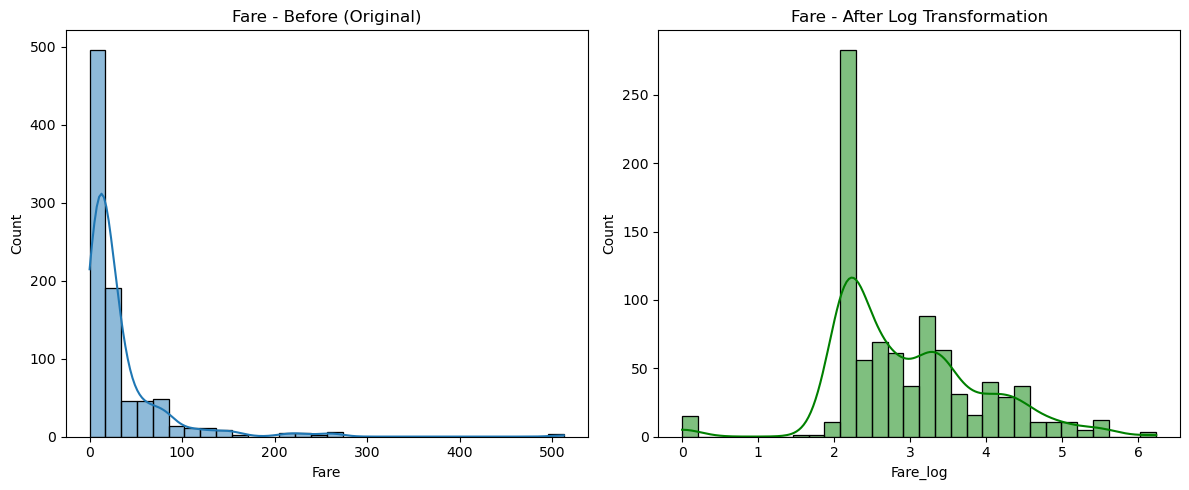

In [34]:
# Fare — Before and After Log Transformation
plt.figure(figsize=(12, 5))

# Before (original Fare)
plt.subplot(1, 2, 1)
sns.histplot(data2['Fare'], kde=True, bins=30)
plt.title('Fare - Before (Original)')

# After (log transformed)
plt.subplot(1, 2, 2)
sns.histplot(data2['Fare_log'], kde=True, bins=30, color='green')
plt.title('Fare - After Log Transformation')

plt.tight_layout()
plt.show()

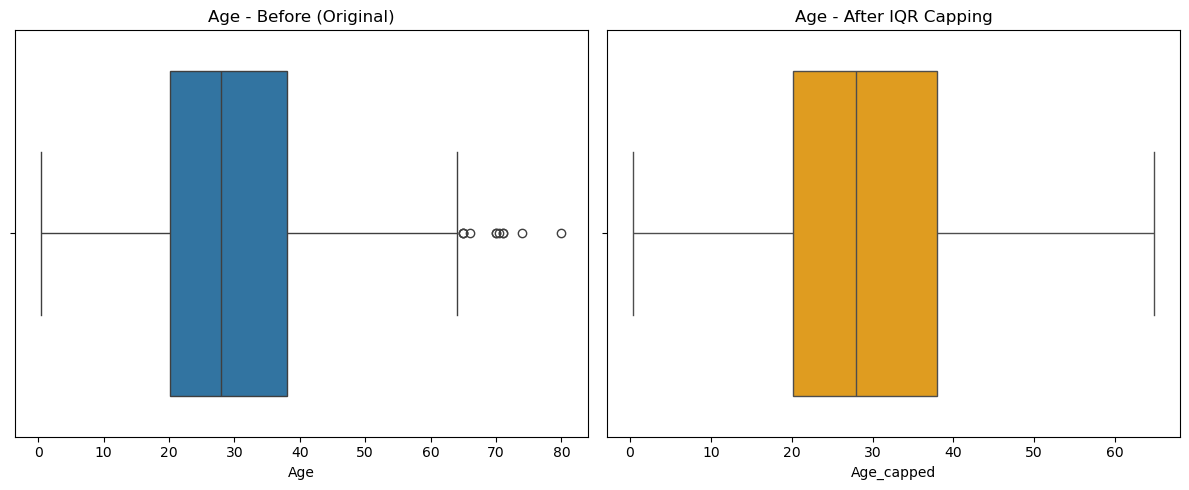

In [35]:
# Age — Before and After IQR
plt.figure(figsize=(12, 5))

# Before (original Age)
plt.subplot(1, 2, 1)
sns.boxplot(x=data2['Age'])
plt.title('Age - Before (Original)')

# After (capped Age)
plt.subplot(1, 2, 2)
sns.boxplot(x=data2['Age_capped'], color='orange')
plt.title('Age - After IQR Capping')

plt.tight_layout()
plt.show()
